In [1]:
%matplotlib inline
%load_ext nengo.ipynb

<IPython.core.display.Javascript object>

In [2]:
import matplotlib.pyplot as plt
import nengo
import numpy as np
from nengo import spa

In [ ]:
from imem.legacy.context import BoundedIntegrator

In [26]:
d = 64
beta = 0.6

rng = np.random.RandomState(seed=1)
vocab = spa.Vocabulary(d, rng=rng)

def stimulus(t):
    if t < 1.:
        return np.zeros(d)
    else:
        v = vocab.parse('InitStim').v
        for i in range(int(t)):
            v = np.sqrt(1. - beta**2) * v + beta * vocab.parse('IN' + str(i)).v
        return v
        #return vocab.parse('IN' + str(int(t))).v
    
def context_initialization(t, x):
    if t < .5:
        return 5. * (vocab.parse('InitCtx').v - x)
    else:
        return np.zeros(d)

with nengo.Network(seed=2) as model:
    input_node = nengo.Node(stimulus)
    context_net = BoundedIntegrator(d, beta)
    nengo.Connection(input_node, context_net.input)
    
    initialization_node = nengo.Node(context_initialization, size_in=d)
    nengo.Connection(initialization_node, context_net.current.input)
    nengo.Connection(context_net.current.output, initialization_node)
    
    p_in = nengo.Probe(input_node, synapse=0.01)
    p_out = nengo.Probe(context_net.output, synapse=0.01)

In [27]:
with nengo.Simulator(model) as sim:
    sim.run(10.)

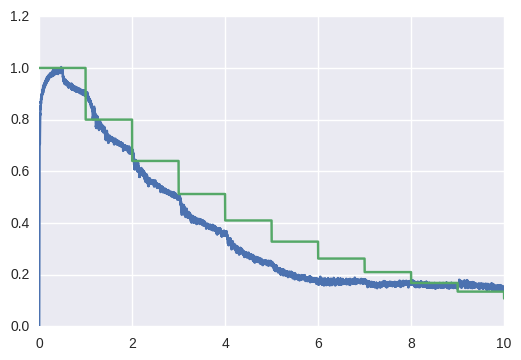

In [28]:
plt.plot(sim.trange(), np.dot(sim.data[p_out], vocab['InitCtx'].v))
plt.plot(sim.trange(), np.sqrt(1. - beta**2) ** np.floor(sim.trange()))

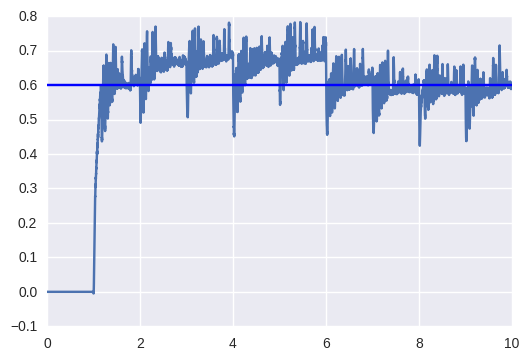

In [29]:
plt.plot(sim.trange(), np.sum(sim.data[p_out] * sim.data[p_in], axis=1))
plt.axhline(y=beta)

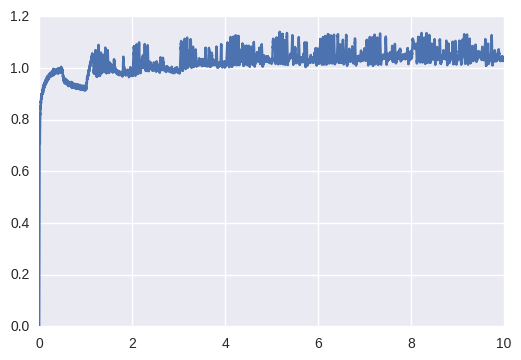

In [30]:
plt.plot(sim.trange(), np.linalg.norm(sim.data[p_out], axis=1))

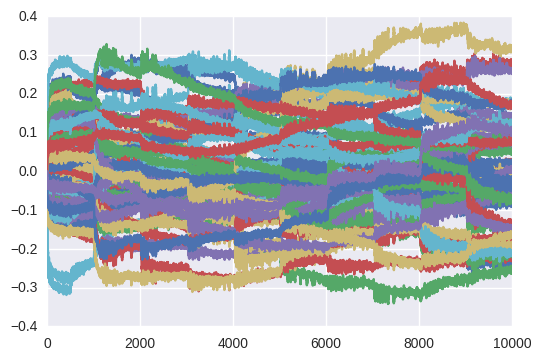

In [31]:
plt.plot(sim.data[p_out]);

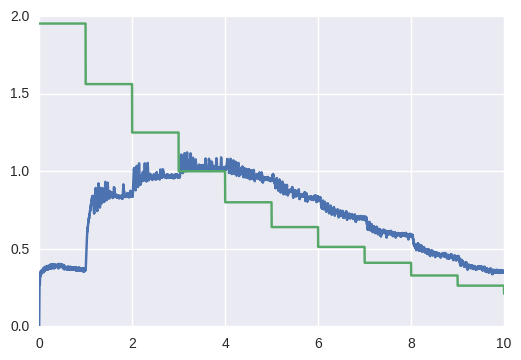

In [35]:
plt.plot(sim.trange(), np.dot(sim.data[p_out], sim.data[p_out][3500]))
plt.plot(sim.trange(), np.sqrt(1. - beta**2) ** np.floor(sim.trange() -3))